In [1]:
import numpy as np
import pandas as pd
import mrcfile
import cv2
import glob
from matplotlib import pyplot as plt, patches
import math
%matplotlib inline
from moviepy.Clip import *


In [2]:
def transform(image):
    i_min = image.min()
    i_max = image.max()

    image = ((image - i_min)/(i_max - i_min)) * 255
    return image.astype(np.uint8)

In [3]:
def plotting(images, captions, cols=2):
    plt.figure(figsize=(20,20))
    for i, image in enumerate(images):
        plt.subplot(1, cols, i + 1)
        plt.grid(False)        
        
        fig = plt.imshow(image, cmap='gray')
        plt.title(captions[i], fontdict= {'fontsize':12}, color = 'black')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.show()

In [18]:
micrograph_path = '/media/ashwin/data2/Ashwin/Projects/cryoEM/particle_picker/10345_10_data/micrographs/18jam15a_0007_ali_DW.mrc'
particle_coordinate_path = '/media/ashwin/data2/Ashwin/Projects/cryoEM/particle_picker/10345_10_data/particle_coordinates/18jam15a_0007_ali_DW.csv'
image = mrcfile.read(micrograph_path)

image = image.T
image = np.rot90(image)
image = transform(image)
print(image.shape)
resized_image = cv2.resize(image, (1024, 1024), interpolation = cv2.INTER_AREA)
print(resized_image.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/media/ashwin/data2/Ashwin/Projects/cryoEM/particle_picker/10345_10_data/micrographs/18jam15a_0007_ali_DW.mrc'

In [5]:
resized_image = cv2.resize(image, (1024, 1024), interpolation = cv2.INTER_AREA)

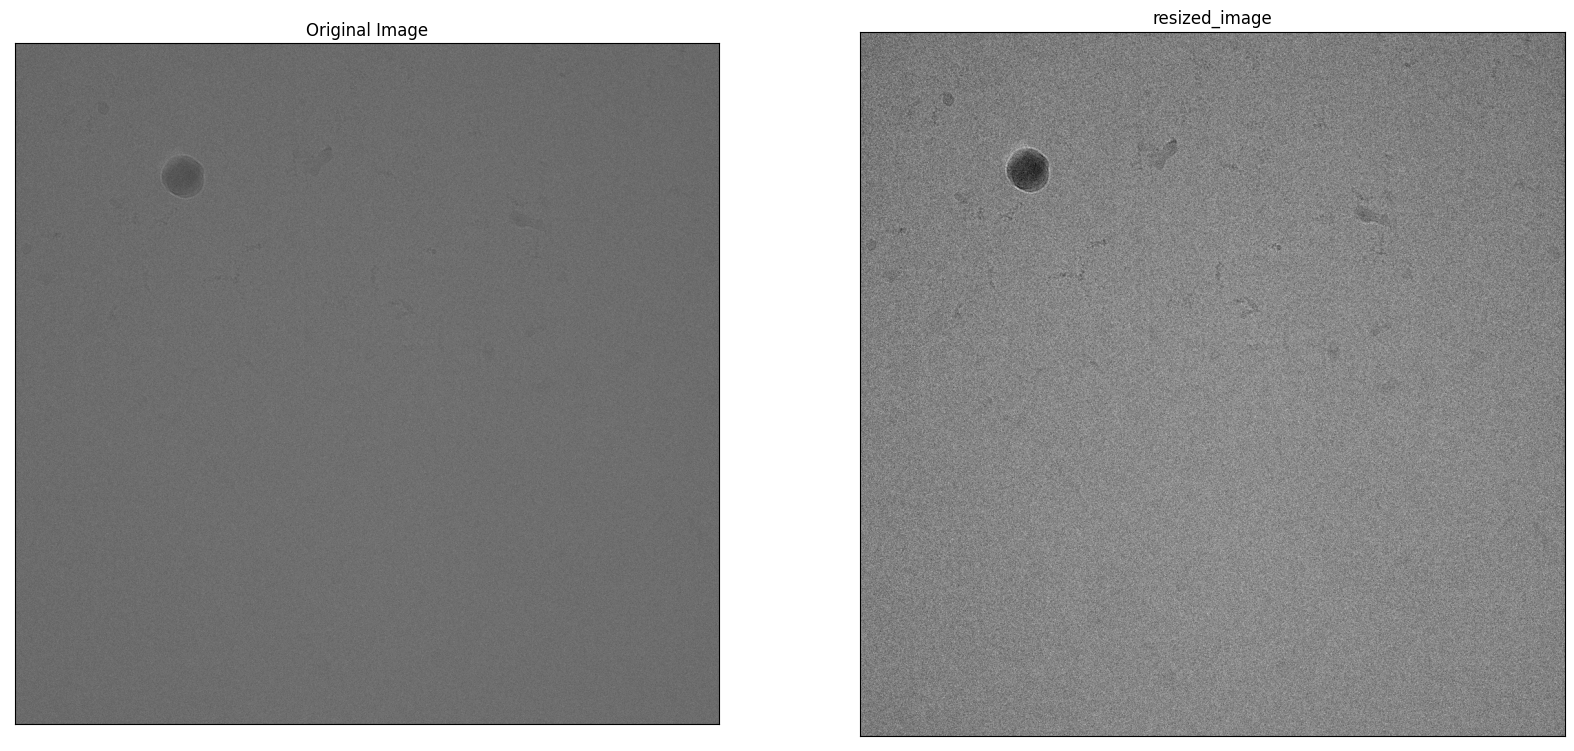

In [6]:
plotting([image, resized_image], ['Original Image', 'resized_image'])

In [7]:
particle_coord = pd.read_csv(particle_coordinate_path)
particle_coord.head()

,X-Coordinate,Y-Coordinate,Diameter,Angle-Psi,Origin X (Ang),Origin Y (Ang),Defocus U,Defocus V,Defocus Angle,Phase Shift,CTF B Factor
0,217,1049,149,142.346924,-4.593225,1.093625,3143.707031,3012.168945,238.600433,0.0,0.0
1,1318,1113,149,59.693874,6.780475,1.968525,3121.537598,2989.999512,238.600433,0.0,0.0
2,2021,716,149,90.918365,-0.218725,0.218725,3071.115234,2939.577148,238.600433,0.0,0.0
3,2264,1139,149,0.918367,-1.093625,-0.218725,3099.890625,2968.352539,238.600433,0.0,0.0
4,1945,1279,149,313.163269,-1.093625,2.405975,3119.567383,2988.029297,238.600433,0.0,0.0


##A rectangle defined via an anchor point xy and its width and height.


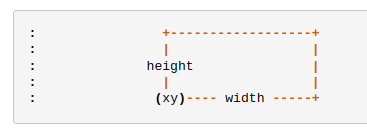

In [8]:
particle_coord['anchor_x'] = particle_coord['X-Coordinate'] - particle_coord['Diameter'] / 2
particle_coord['anchor_y'] = particle_coord['Y-Coordinate'] + particle_coord['Diameter'] / 2

particle_coord['width_height'] = particle_coord['Diameter']

box_coord = particle_coord[['anchor_x', 'anchor_y', 'width_height']]
box_coord.head()


,anchor_x,anchor_y,width_height
0,142.5,1123.5,149
1,1243.5,1187.5,149
2,1946.5,790.5,149
3,2189.5,1213.5,149
4,1870.5,1353.5,149


In [9]:
box_coord_list = box_coord.values.tolist()
box_coord_list

[[142.5, 1123.5, 149.0],
 [1243.5, 1187.5, 149.0],
 [1946.5, 790.5, 149.0],
 [2189.5, 1213.5, 149.0],
 [1870.5, 1353.5, 149.0],
 [2919.5, 253.5, 149.0],
 [1128.5, 1366.5, 149.0],
 [2765.5, 1225.5, 149.0],
 [3379.5, 291.5, 149.0],
 [3520.5, 880.5, 149.0],
 [2803.5, 739.5, 149.0],
 [462.5, 1571.5, 149.0],
 [2432.5, 573.5, 149.0],
 [2906.5, 1353.5, 149.0],
 [2061.5, 1520.5, 149.0],
 [641.5, 1392.5, 149.0],
 [206.5, 496.5, 149.0],
 [1703.5, 1481.5, 149.0],
 [577.5, 1046.5, 149.0],
 [2125.5, 752.5, 149.0],
 [3008.5, 1929.5, 149.0],
 [2074.5, 253.5, 149.0],
 [1806.5, 253.5, 149.0],
 [334.5, 547.5, 149.0],
 [2049.5, 573.5, 149.0],
 [2496.5, 1072.5, 149.0],
 [1678.5, 509.5, 149.0],
 [1767.5, 1955.5, 149.0],
 [1435.5, 1161.5, 149.0]]

In [13]:
from pylab import *

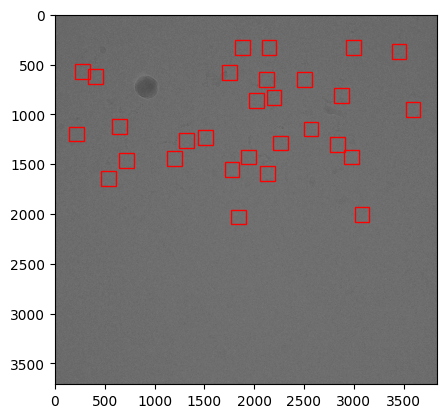

In [14]:
# def draw_bounding_box(resized_image, boxes):
# pahile image define garne, garisakyo

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
plt.imshow(image)

# Create a Rectangle patch
for i, box in enumerate(box_coord_list):
    x= (box_coord_list[i][0])
    y = box_coord_list[i][1]
    width = box_coord_list[i][2]
    height = box_coord_list[i][2]
    rect = patches.Rectangle((x,y), width, width, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
a= imshow(image, cmap='gray')
# h = get_frame
# im = h.cdata


In [ ]:
# draw_bounding_box(resized_image, boxes)

In [17]:
plt.a

AttributeError: module 'matplotlib.pyplot' has no attribute 'a'